<a href="https://colab.research.google.com/github/A1harRv/tumor-detection-using-sklearn/blob/main/Tumor_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
!pip install kaggle


In [ ]:
import pandas as pd
from google.colab import files
files.upload()


In [9]:
dataset = pd.read_csv("data.csv")

In [16]:
dataset.drop(["id"],axis=1,inplace=True)

In [ ]:
dataset.head(5)

In [ ]:
dataset.diagnosis = [1 if i is 'M' else 0 for i in dataset.diagnosis]

In [ ]:
dataset.head(20)

In [25]:
y = dataset.diagnosis
x = dataset.drop(["diagnosis"],axis=1)

In [63]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [42]:
scaler.fit(x)
x_scaled = scaler.transform(x)

<Axes: xlabel='diagnosis'>

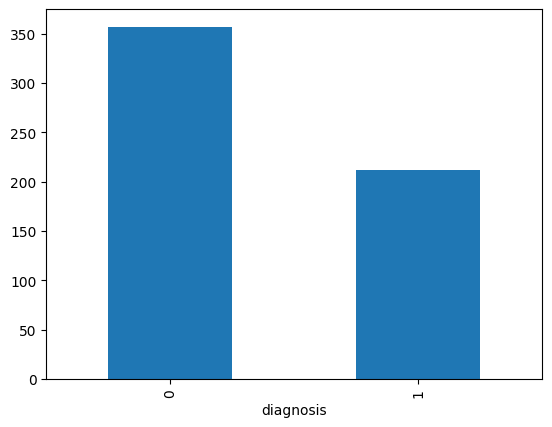

In [38]:
dataset.diagnosis.value_counts().plot(kind='bar')

Splitting the data into training and testing


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42)

Training the Model


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

In [60]:
y_pred = lr.predict_proba(x_test)[:,1]
y_pred = [1 if i>0.2 else 0 for i in y_pred]

In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred,normalize=True)*100)

94.73684210526315


thus we have obtained a model with a slightly lower success rate, but have accepted it as a good tradeoff so to prevent false negatives